In [1]:
#The directive "%" talks to Jupter Notebook directly

%matplotlib inline

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
#import Python Image Library (PIL)
from PIL import Image
from numpy import asarray


#import keras
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image


#current path
import os
PATH = os.getcwd()
print(PATH)


/home/luc/Jupyter Notebooks/Object Localization/Dogs vs Cats


Using TensorFlow backend.


folder {}
filename {}
source {}
size {}
segmented {}
object {}
annotation
folder
filename
source
database
annotation
image
size
width
height
depth
segmented
object
name
pose
truncated
occluded
bndbox
xmin
ymin
xmax
ymax
difficult
333 72 425 158


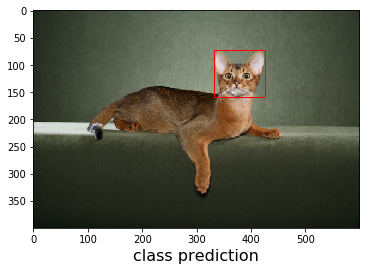

In [3]:

Abyssinian1 = ET.parse('./annotations/xmls/Abyssinian_1.xml')

root_Abyssinian1 = Abyssinian1.getroot()

#Name of top-level tag of the XML Tree; the root of the tree
root_Abyssinian1.tag

#Print out all children from root
for child in root_Abyssinian1:
    print(child.tag, child.attrib)

#Print out all elements of the tree
for elem in root_Abyssinian1.iter():
    print(elem.tag)

#Search for element bndbox, and within bndbox search for child element
#and output the text: bndbox.find('NAME_OF_CHILDELEMENT').text

for bndbox in root_Abyssinian1.iter('bndbox'):
    
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    
    print(xmin, ymin, xmax, ymax)
    
#---------------------------#
#Draw bounding box around bounding box coordinates:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('./images/Abyssinian_1.jpg'))

# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
#((x,y), width, height), where (x,y) is coordinate of top left bounding box corner
rect = patches.Rectangle((333,72),425-333,158-72,linewidth=1,edgecolor='r', facecolor='none')
#allgemein: ((xmin, ymin), xmax-xmin, ymax-ymin)

# Add the patch to the Axes
ax.add_patch(rect)

#Output Class prediction below the image
ax.set_xlabel('class prediction', fontsize=16)


plt.show()

In [22]:
#define path of images to be trained
train_img_path = PATH + '/selected dataset/selected images/'

img_train = []

#lst = List of all images in train_img_path
lst = os.listdir(train_img_path)
#sort the lst alphabetically
lst.sort()

print(len(lst))

print(lst[527])


for i in range(1, 1000):
        print(lst[i])





1186
Egyptian_Mau_13.jpg
Abyssinian_10.jpg
Abyssinian_100.jpg
Abyssinian_101.jpg
Abyssinian_102.jpg
Abyssinian_103.jpg
Abyssinian_105.jpg
Abyssinian_106.jpg
Abyssinian_107.jpg
Abyssinian_108.jpg
Abyssinian_109.jpg
Abyssinian_11.jpg
Abyssinian_110.jpg
Abyssinian_111.jpg
Abyssinian_112.jpg
Abyssinian_113.jpg
Abyssinian_114.jpg
Abyssinian_115.jpg
Abyssinian_116.jpg
Abyssinian_117.jpg
Abyssinian_118.jpg
Abyssinian_119.jpg
Abyssinian_12.jpg
Abyssinian_120.jpg
Abyssinian_121.jpg
Abyssinian_122.jpg
Abyssinian_123.jpg
Abyssinian_124.jpg
Abyssinian_125.jpg
Abyssinian_126.jpg
Abyssinian_127.jpg
Abyssinian_128.jpg
Abyssinian_129.jpg
Abyssinian_13.jpg
Abyssinian_130.jpg
Abyssinian_131.jpg
Abyssinian_132.jpg
Abyssinian_133.jpg
Abyssinian_134.jpg
Abyssinian_135.jpg
Abyssinian_136.jpg
Abyssinian_137.jpg
Abyssinian_138.jpg
Abyssinian_139.jpg
Abyssinian_14.jpg
Abyssinian_140.jpg
Abyssinian_141.jpg
Abyssinian_142.jpg
Abyssinian_143.jpg
Abyssinian_144.jpg
Abyssinian_145.jpg
Abyssinian_146.jpg
Abyssinian_

In [5]:
#print first element of List lst
print(lst[0])

Abyssinian_1.jpg


In [9]:
print(lst[527])

img_path = train_img_path + lst[527]

test_image = Image.open(img_path)
test_image = test_image.resize((resized_width, resized_height), 3)
data1 = asarray(test_image)
data = np.expand_dims(data1, axis=0)

print(data.shape)



Egyptian_Mau_13.jpg
(1, 100, 100, 3)


In [7]:
#Set resized dimensions:
resized_width = 100
resized_height = 100

j=0


#For each image in lst, 
for sample in lst:
    j+=1
    print(j)
    #take the specific path to that image,
    img_path = train_img_path + sample
    #load that image,
    test_image = Image.open(img_path)
    #resize that image,
    test_image = test_image.resize((resized_width, resized_height), 3)
    #test_image = test_image.resize((resized_width, resized_height))
    #turn it into an array,
    data1 = asarray(test_image)
    #data1 = data1.reshape(resized_width, resized_height, 3)
    #expand that 3-dim array into 4-dim array.
    data = np.expand_dims(data1, axis=0)
    if img_path == train_img_path + lst[0]:
        #specify the first image/array to be the "total" img_array
        img_array = data
    else:
        #append all following arrays to the img_array
        print(img_array.shape, data.shape, data1.shape, test_image.size)
        img_array = np.append(img_array, data, axis=0)
    
#for white-and-black pics (channels=1), we can normalize the data points:
#img_array = img_array / 255
#now we can limit the range of the values to be of type float32:
#img_array = img_array.astype('float32')

#check format: should be numpy.ndarray
print(type(img_array))
#check shape: should be (number of pics, width, height, colourdimension)
print(img_array.shape)


1
2
(1, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
3
(2, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
4
(3, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
5
(4, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
6
(5, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
7
(6, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
8
(7, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
9
(8, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
10
(9, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
11
(10, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
12
(11, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
13
(12, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
14
(13, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
15
(14, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
16
(15, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
17
(16, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
18
(17,

133
(132, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
134
(133, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
135
(134, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
136
(135, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
137
(136, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
138
(137, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
139
(138, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
140
(139, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
141
(140, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
142
(141, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
143
(142, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
144
(143, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
145
(144, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
146
(145, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
147
(146, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
148
(147, 100, 100, 3) (1

(279, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
281
(280, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
282
(281, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
283
(282, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
284
(283, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
285
(284, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
286
(285, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
287
(286, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
288
(287, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
289
(288, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
290
(289, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
291
(290, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
292
(291, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
293
(292, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
294
(293, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
295
(294, 100, 100, 3) (1, 10

(423, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
425
(424, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
426
(425, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
427
(426, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
428
(427, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
429
(428, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
430
(429, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
431
(430, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
432
(431, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
433
(432, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
434
(433, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
435
(434, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
436
(435, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
437
(436, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
438
(437, 100, 100, 3) (1, 100, 100, 3) (100, 100, 3) (100, 100)
439
(438, 100, 100, 3) (1, 10

ValueError: all the input arrays must have same number of dimensions

In [ ]:
# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
first_test_image = Image.open(train_img_path + lst[0])
first_test_image = first_test_image.resize((resized_width, resized_height), 3)
ax.imshow(first_test_image)

# Create a Rectangle patch
#((x,y), width, height), where (x,y) is coordinate of top left bounding box corner
#modify bounding box with axis ratio to hit the right spot:
rect = patches.Rectangle((1/6 * 333, 1/4 * 72),1/6 *425-1/6 *333,1/4 *158-1/4 *72,linewidth=1,edgecolor='r', facecolor='none')
#allgemein: ((xmin, ymin), xmax-xmin, ymax-ymin)

# Add the patch to the Axes
ax.add_patch(rect)

#Output Class prediction below the image
ax.set_xlabel('class prediction', fontsize=16)


plt.show()

In [ ]:
#define path of labels
train_labels_path = PATH + '/selected dataset/selected xmls/'

#list all files in directory train_labels_path:
lst_label = os.listdir(train_labels_path)
#sort this list:
lst_label.sort()

#output this list:
#lst_label

In [ ]:
print(type(lst_label))
print(lst_label[0])

In [ ]:
label_array =[]
label_array_reg =[]

#count number of labels. 
i=0


#For any xml-files in the lst_label list,
for sample_label in lst_label:
    i += 1
    #take its path,
    label_path = train_labels_path + sample_label
    #parse the xml file,
    xml = ET.parse(label_path)
    #get the root of the xml file.
    root_xml = xml.getroot()
    
    #Within the root, look for subbranch bndbox and iterate through its objects
    for bndbox in root_xml.iter('bndbox'):
    
        #fetch the coordinates:
        xmin = float(bndbox.find('xmin').text)
        ymin = float(bndbox.find('ymin').text)
        xmax = float(bndbox.find('xmax').text)
        ymax = float(bndbox.find('ymax').text)
        
        
    for orig_size in root_xml.iter('size'):
        
        width = float(orig_size.find('width').text)
        height = float(orig_size.find('height').text)
        
    #Within the root, look for the subbranch object and iterate through its objects    
    for animal_name in root_xml.iter('object'):
        
        #fetch the name of the animal
        animal = animal_name.find('name').text
        
        if animal == 'dog':
            animal = 1  
        else:
            animal = 0
    
    
    #Ratios:
    #For x:
    x_ratio = resized_width/width
    #For y:
    y_ratio = resized_height/height
    
    
    
    #save the coordinates and the class label in a small label array
    little_array2 = np.array([xmin*x_ratio, ymin*y_ratio, xmax*x_ratio, ymax*y_ratio])
    
    
    
    #save class labels in small label array
    little_array = np.array([animal])
    
    #If its the first xml label, 
    if label_path == train_labels_path + lst_label[0]:
        #then start off with the small array to be the "total" label array
        label_array = np.append(label_array, little_array)
    else:
        #otherwise, all other label arrays are appended to the "total" array
        label_array = np.append(label_array, little_array, axis=0)     
        
        
        #If its the first xml label, 
    if label_path == train_labels_path + lst_label[0]:
        #then start off with the small array to be the "total" label array
        label_array_reg = np.append(label_array_reg, little_array2)
    else:
        #otherwise, all other label arrays are appended to the "total" array
        label_array_reg = np.append(label_array_reg, little_array2, axis=0)   

        
        
#In the end, the number of labels is equivalent to the 4 parameter values times all the labels        
print(int(label_array_reg.shape[0]/4), i)

In [ ]:
#Reshape to achieve format (total number of labels, 5)    
label_array_reg = np.reshape(label_array_reg, (i,4))    

#Reshape to achieve format (total number of labels, 1)    
label_array = np.reshape(label_array, (i,1))    

In [ ]:
#check format: should be numpy.ndarray
print(type(label_array))
#check shape: should be (number of pics, number of labels)
#here: number of labels = 4 (xmin, ymin, xmax, ymax) + 1 (class name: 1 for dog, 0 for cat) = 5
print(label_array.shape)

print(type(label_array_reg))
print(label_array_reg.shape)
print(label_array_reg)

In [ ]:
num_classes = 2
input_shape = (resized_width, resized_height, 3)

batch_size = 8
epochs = 2

num_regressions = 4

In [ ]:
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

label_array = keras.utils.to_categorical(label_array, num_classes)

In [ ]:
#print(label_array_reg.shape)
#print(label_array)

In [ ]:
model_base = Sequential()

model_base.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Conv2D(8, (3, 3), activation='relu'))
model_base.add(MaxPooling2D(pool_size=(2, 2)))
model_base.add(Dropout(0.25))

model_base.add(Conv2D(16, (3, 3), activation='relu'))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

#model_base.add(Conv2D(128, (3, 3), activation='relu'))
#model_base.add(MaxPooling2D(pool_size=(2, 2)))

#model_base.add(Conv2D(32, (3, 3), activation='relu'))
#model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Flatten())

#model_base.add(Dense(256, activation='relu'))
#model_base.add(Dropout(0.3))

model_base.add(Dense(64, activation='relu'))
model_base.add(Dropout(0.25))


model_base.add(Dense(num_classes, activation='sigmoid'))

model_base.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_base.summary()

In [ ]:
model_base.fit(img_array, label_array,
          batch_size=4,
          epochs=1,
          verbose=1)

In [ ]:
regression_head = Sequential()

regression_head.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
regression_head.add(MaxPooling2D(pool_size=(2, 2)))

regression_head.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
regression_head.add(MaxPooling2D(pool_size=(2, 2)))

#regression_head.add(Conv2D(32, (3, 3), activation='relu'))
#regression_head.add(MaxPooling2D(pool_size=(2, 2)))

regression_head.add(Flatten())
regression_head.add(Dense(128, activation='relu'))
regression_head.add(Dropout(0.3))
#Last layer should be regressionally trained, so have ReLU activation to preserve possibly high values
regression_head.add(Dense(num_regressions, activation='relu'))

regression_head.compile(optimizer='adam', 
              loss='mse',
              metrics=['accuracy'])

In [ ]:
regression_head.summary()

In [ ]:
regression_head.fit(img_array, label_array_reg,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

In [ ]:
model_base.save("model_base.h5")
print("Saved model for classification to disk")

regression_head.save("regression_head.h5")
print("Saved model for regression values to disk")

In [ ]:
from keras.models import load_model

model_base = load_model('model_base.h5')
regression_head = load_model('regression_head.h5')

In [ ]:
PATH

In [ ]:
from keras.preprocessing import image

#load image from 'test' folder to be predicted;
#transform them to the right size 100x100
#these images are totally new to the CNN
img = image.load_img(PATH + "/images/Maine_Coon_262.jpg", target_size=(100, 100))
#make an array out of it
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
x2 = np.expand_dims(x, axis=0)
# Make a prediction with the CNN
prediction = model_base.predict(x2)

#prediction will either be [[1. 0.]] or [[0. 1.]]
#[[1. 0.]] means: cat
#[[0. 1.]] means: dog
print(prediction)

#Prediction output:
#prediction[0][0] will grab the first element of the array, prediction[0][1] the second
if prediction[0][0] > 0.5:
    print("It's a cat!")
else:
    print("It's a dog!")

In [ ]:

prediction_reg = regression_head.predict(x2)
print(prediction_reg)


xmin = prediction_reg[0][0]
ymin = prediction_reg[0][1]
xmax = prediction_reg[0][2]
ymax = prediction_reg[0][3]

#im = np.array(Image.open(PATH + "/images/staffordshire_bull_terrier_4.jpg"))

# Create figure and axes
#Polar Subplot with
# x-Axis running from left to right
# y-Axis running from top to bottom
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

#fig,ax = plt.subplots(1)

# Display the image
#ax.imshow(img)
rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r', facecolor='none')

ax.add_patch(rect)



